# **Business Case: Delhivery - Feature Engineering**





**About Delhivery:**

🚚Delhivery, India's leading and rapidly growing integrated player, has set its sights on creating the commerce operating system. They achieve this by utilizing world-class infrastructure, ensuring the highest quality in logistics operations, and harnessing cutting-edge engineering and technology capabilities.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181
To: /content/delhivery_data.csv?1642751181
100% 55.6M/55.6M [00:00<00:00, 72.2MB/s]


In [ ]:
df=pd.read_csv('/content/delhivery_data.csv?1642751181')

In [ ]:
print(f"The initial shape of the DataFrame is : {df.shape}")

The initial shape of the DataFrame is : (144867, 24)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

This dataset, with multiple timestamp, numerical, and categorical variables, offers comprehensive insights into the logistics and transportation activities handled by Delhivery. It provides data on both full truckload and carting routes, time, distance, calculations, and operational performance. Analysis of this dataset can help in optimizing routes, improving delivery times.

In [ ]:
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [ ]:
df.head(2)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111


In [ ]:
df.nunique()

,0
data,2
trip_creation_time,14817
route_schedule_uuid,1504
route_type,2
trip_uuid,14817
source_center,1508
source_name,1498
destination_center,1481
destination_name,1468
od_start_time,26369


In [ ]:
df.duplicated().sum()

0

##**1. Basic data cleaning and exploration:**

1. Handle missing values in the data.

In [ ]:
# Check for missing values and print columns with missing values
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
display(HTML("<b>Columns with NULL values:</b>"))
print(missing_columns)

source_name         293
destination_name    261
dtype: int64


There are 293 missing values in the source_name column and 261 in the
destination_name column. These missing values may be due to incomplete data collection or blank entries and should be addressed through imputation, removal, orfurther investigation to ensure data integrity.

In [ ]:
# Check if missing values are in the same rows for 'source_name' and 'destination_name'

missing_rows = df[df['source_name'].isnull() & df['destination_name'].isnull()]
display(HTML("<b>Rows with missing values in both 'source_name' and 'destination_name':</b> "))
print(len(missing_rows))

3


Checked if both the source_name and destination_name columns had missing values in the same rows. Out of the total missing values, only 3 rows have missing values in both columns.

In [ ]:
# Create a mapping of 'source_center' to 'source_name' and impute missing 'source_name'

source_mapping = df.groupby('source_center')['source_name'].first().to_dict()
df['source_name'] = df.apply(lambda row: source_mapping.get(row['source_center'], row['source_name']), axis=1)

# Create a mapping of 'destination_center' to 'destination_name' and impute missing 'destination_name'

destination_mapping = df.groupby('destination_center')['destination_name'].first().to_dict()
df['destination_name'] = df.apply(lambda row: destination_mapping.get(row['destination_center'], row['destination_name']), axis=1)


In [ ]:
# Missing values after imputation in both columns

missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
display(HTML("<b>Columns with NULL values:</b>"))
print(missing_columns)

source_name         293
destination_name    261
dtype: int64


After imputing the missing values between source_center and source_name, as well as between destination_center and destination_name, the number of missing values remains unchanged. This suggests that source_name and destination_name were not properly recorded in the dataset.

In [ ]:
# Count unique 'source_center' where 'source_name' is still missing

missing_source_center = df[df['source_name'].isnull()]['source_center'].nunique()
display(HTML(f"<b>Number of unique 'source_center' where 'source_name' is still missing:</b> {missing_source_center}"))

# Count unique 'destination_center' where 'destination_name' is still missing

missing_destination_center = df[df['destination_name'].isnull()]['destination_center'].nunique()
display(HTML(f"<b>Number of unique 'destination_center' where 'destination_name' is still missing:</b> {missing_destination_center}"))


In [ ]:
# Comparing unique values between source center and source name as well as destination center and destination name

unique_counts=df[["source_center","source_name","destination_center","destination_name"]].nunique()
for column, count in unique_counts.items():
    print(f"{column}: {count}")


source_center: 1508
source_name: 1498
destination_center: 1481
destination_name: 1468


We compared the unique counts of the source_center and source_name
columns, as well as the destination_center and destination_name
columns, to cross-check our previous findings regarding missing values.The results showed a difference of 10 unique values between
source_center and source_name, and a difference of 13unique values between destination_center and destination_name. This confirms that specific centers lack corresponding names, aligning with our earlier observations of missing data.

In [ ]:
# Identify rows where source_name is missing
missing_source_indices = df[df['source_name'].isnull()].index

# Create unique placeholders for missing source_name values (SN for Source Name)
unique_placeholders = [f'SN_{i}' for i in range(len(missing_source_indices))]

# Replace missing source_name values with placeholders
df.loc[missing_source_indices, 'source_name'] = unique_placeholders


# Identify rows where destination_name is missing
missing_destination_indices = df[df['destination_name'].isna()].index

# Create unique placeholders for missing destination_name values (DN for Destination Name)
unique_placeholders = [f'DN_{i}' for i in range(len(missing_destination_indices))]

# Replace missing destination_name values with placeholders
df.loc[missing_destination_indices, 'destination_name'] = unique_placeholders

If the unique center codes are sufficient for analysis and further insights, dropping the source_name and destination_name
columns would reduce redundancy without impacting the quality of the analysis. This approachsimplifies the dataset and ensures completeness. Alternatively, keeping the name columns and filling in missing values withplaceholders (e.g., "Unknown") could be an option if the names provide additional interpretability or are required fordownstream analysis. This way, we preserve the information while handling the missing data transparently.

To preserve the uniqueness of the source_center and source_name combinations, as well as the destination_center and destination_name
combinations, we can assign unique placeholder values for the missing
source_name and destination_name entries. This approach ensures that each center still has a distinct identifier evenif the name is missing.

In [ ]:
df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


After imputing placeholders, the data no longer contains any null values

# Converting time columns into pandas datetime.

In [ ]:
# copying dataframe to ddf
ddf=df.copy()

In [ ]:
unknown_fields=["is_cutoff", "cutoff_factor", "cutoff_timestamp", "factor" ,"segment_factor"]
ddf=ddf.drop(columns = unknown_fields)

In [ ]:
ddf.shape

(144867, 19)

In [ ]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144867 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144867 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  actual_distance_

In [ ]:
ddf.nunique()

,0
data,2
trip_creation_time,14817
route_schedule_uuid,1504
route_type,2
trip_uuid,14817
source_center,1508
source_name,1791
destination_center,1481
destination_name,1729
od_start_time,26369


In [ ]:
from datetime import time
# Converting the datatypes to category for columns like data and route_type as they only have 2 values.

category_columns = ['data', 'route_type']
ddf[category_columns] = ddf[category_columns].astype('category')

# Converting time columns to datetime format

time_columns = ['trip_creation_time', 'od_start_time' ,'od_end_time']
ddf[time_columns] = ddf[time_columns].apply(pd.to_datetime)

# Analyze structure & characteristics of the dataset

In [ ]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144867 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144867 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [ ]:
ddf.describe().T

,count,mean,min,25%,50%,75%,max,std
trip_creation_time,144867,2018-09-22 13:34:23.659819264,2018-09-12 00:00:16.535741,2018-09-17 03:20:51.775845888,2018-09-22 04:24:27.932764928,2018-09-27 17:57:56.350054912,2018-10-03 23:59:42.701692,NaN
od_start_time,144867,2018-09-22 18:02:45.855230720,2018-09-12 00:00:16.535741,2018-09-17 08:05:40.886155008,2018-09-22 08:53:00.116656128,2018-09-27 22:41:50.285857024,2018-10-06 04:27:23.392375,NaN
od_end_time,144867,2018-09-23 10:04:31.395393024,2018-09-12 00:50:10.814399,2018-09-18 01:48:06.410121984,2018-09-23 03:13:03.520212992,2018-09-28 12:49:06.054018048,2018-10-08 03:00:24.353479,NaN
start_scan_to_end_scan,144867.0,961.262986,20.0,161.0,449.0,1634.0,7898.0,1037.012769
actual_distance_to_destination,144867.0,234.073372,9.000045,23.355874,66.126571,286.708875,1927.447705,344.990009
actual_time,144867.0,416.927527,9.0,51.0,132.0,513.0,4532.0,598.103621
osrm_time,144867.0,213.868272,6.0,27.0,64.0,257.0,1686.0,308.011085
osrm_distance,144867.0,284.771297,9.0082,29.9147,78.5258,343.19325,2326.1991,421.119294
segment_actual_time,144867.0,36.196111,-244.0,20.0,29.0,40.0,3051.0,53.571158
segment_osrm_time,144867.0,18.507548,0.0,11.0,17.0,22.0,1611.0,14.77596


In [ ]:
ddf.describe(include='object').T

,count,unique,top,freq
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
trip_uuid,144867,14817,trip-153811219535896559,101
source_center,144867,1508,IND000000ACB,23347
source_name,144867,1791,Gurgaon_Bilaspur_HB (Haryana),23347
destination_center,144867,1481,IND000000ACB,15192
destination_name,144867,1729,Gurgaon_Bilaspur_HB (Haryana),15192


In [ ]:
num_columns=ddf.select_dtypes(include=np.number).columns
num_columns

Index(['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance'],
      dtype='object')

In [ ]:
cat_columns=ddf.select_dtypes(include='category').columns
cat_columns

Index(['data', 'route_type'], dtype='object')

In [ ]:
time_columns=ddf.select_dtypes(include='datetime64[ns]').columns
time_columns

Index(['trip_creation_time', 'od_start_time', 'od_end_time'], dtype='object')

<Axes: >

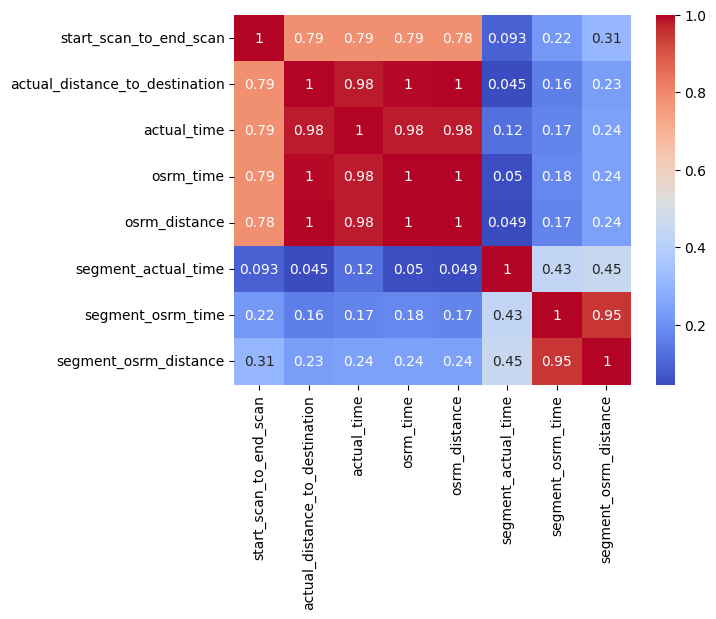

In [ ]:
sns.heatmap(ddf[num_columns].corr(),annot=True,cmap='coolwarm')

* start_scan_to_end_scan, actual_distance_to_destination, actual_time, osrm_time, and osrm_distance all exhibit strong positive correlations with each other, with correlation coefficients close to This suggeststhat these features are highly interdependent.

* segment_actual_time, segment_osrm_time, and segment_osrm_distance
have weaker correlations with the other main variables but are moderately correlated with each other.

# 🕵️‍♂️Exploratory Data Analysis

##**Merging of rows and aggregation of fields**

In [ ]:
ddf['segment_key']= ddf['trip_uuid']+ddf['source_center']+ddf['destination_center']

segment_columns=['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

for col in segment_columns:
    ddf[col+"_sum"]=ddf.groupby('segment_key')[col].cumsum()



In [ ]:
ddf.sample()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
13970,training,2018-09-14 21:30:00.201344,thanos::sroute:1e49263c-7844-4b1e-808b-0802f54...,FTL,trip-153696060020108850,IND813102AAA,Banka_Wardno6_D (Bihar),IND812002AAA,Bhagalpur_Pbroad_DC (Bihar),2018-09-15 04:32:47.112065,...,86.0,40.0,43.6704,40.0,17.0,18.4891,trip-153696060020108850IND813102AAAIND812002AAA,86.0,43.6704,40.0


In [ ]:
# Aggregating at segment level

create_segment_dict = {
    'data': 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid': 'first',
    'route_type': 'first',
    'trip_uuid': 'first',
    'source_center': 'first',
    'source_name': 'first',

    'destination_center': 'last',
    'destination_name': 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',

    'actual_distance_to_destination' :'last',
    'actual_time':'last',
    'osrm_time' :'last',
    'osrm_distance' :'last',
    'segment_actual_time_sum' :'last',
    'segment_osrm_distance_sum' :'last',
    'segment_osrm_time_sum' :'last'
}

### Grouping by Mini Trips and sorting

In [ ]:
segment=ddf.groupby('segment_key').agg(create_segment_dict).reset_index()
segment=segment.sort_values(by=['segment_key','od_end_time'],ascending=True).reset_index()

In [ ]:
segment

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,...,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,...,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,26363,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,...,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0
26364,26364,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,...,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0
26365,26365,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,...,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0
26366,26366,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,...,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0


In [ ]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           26368 non-null  int64         
 1   segment_key                     26368 non-null  object        
 2   data                            26368 non-null  category      
 3   trip_creation_time              26368 non-null  datetime64[ns]
 4   route_schedule_uuid             26368 non-null  object        
 5   route_type                      26368 non-null  category      
 6   trip_uuid                       26368 non-null  object        
 7   source_center                   26368 non-null  object        
 8   source_name                     26368 non-null  object        
 9   destination_center              26368 non-null  object        
 10  destination_name                26368 non-null  object        
 11  od

# **Feature Engineering and Analysis:**

In [ ]:
segment_copy=segment.copy()

In [ ]:
# calculate time taken between od_start_time and od_end_time and keep it as a feature named od_time_diff_hour.

segment['od_time_diff_hour'] = (segment['od_end_time'] - segment['od_start_time']).dt.total_seconds()/(3600)
segment.sample()

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
1397,1397,trip-153680234115299860IND362220AAAIND362225AAA,training,2018-09-13 01:32:21.153364,thanos::sroute:5f7d8d49-ae14-430e-9333-37361e1...,Carting,trip-153680234115299860,IND362220AAA,Junagadh_keshod_DC (Gujarat),IND362225AAA,...,2018-09-13 03:39:21.819843,65.0,25.730593,59.0,27.0,30.9786,58.0,30.9787,27.0,1.087329


In [ ]:
create_trip_dict = {
    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',

}

In [ ]:
trip=segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop=True)
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,37.668497,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,3.026865,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,65.572709,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,1.674916,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,11.972484,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,4.300482,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0
14813,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,1.009842,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0
14814,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,7.035331,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0
14815,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,5.808548,134.723836,264.0,179.0,171.1103,258.0,223.5324,221.0


In [ ]:
trip_copy=trip.copy()

In [ ]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14817 non-null  category      
 1   trip_creation_time              14817 non-null  datetime64[ns]
 2   route_schedule_uuid             14817 non-null  object        
 3   route_type                      14817 non-null  category      
 4   trip_uuid                       14817 non-null  object        
 5   source_center                   14817 non-null  object        
 6   source_name                     14817 non-null  object        
 7   destination_center              14817 non-null  object        
 8   destination_name                14817 non-null  object        
 9   start_scan_to_end_scan          14817 non-null  float64       
 10  od_time_diff_hour               14817 non-null  float64       
 11  ac

In [ ]:
data=trip.copy()

In [ ]:
# Function to split city, place_code, and state

def extract_name(name):
    city = name.split('_')[0]  # The part before the first underscore is the city
    state = name[name.find("(") + 1 : name.find(")")]  # Extract the state inside parentheses
    place_code = name[len(city) + 1 : name.find(f"({state})")].strip('_')  # The part between city and state
    return city, place_code, state

# Apply split_name function to 'source_name' and assign the results to new columns
data[['source_city', 'source_place_code', 'source_state']] = pd.DataFrame(df['source_name'].apply(extract_name).tolist(), index=df.index)

# Apply split_name function to 'destination_name' and assign the results to new columns
data[['destination_city', 'destination_place_code', 'destination_state']] = pd.DataFrame(df['destination_name'].apply(extract_name).tolist(),index=df.index)

In [ ]:
data.sample()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,source_city,source_place_code,source_state,destination_city,destination_place_code,destination_state
13678,test,2018-10-02 01:19:40.323362,thanos::sroute:727a00e4-2906-4258-9e0a-d592433...,Carting,trip-153844318032309920,IND530012AAA,Visakhapatnam_Gajuwaka_IP (Andhra Pradesh),IND530012AAA,Visakhapatnam_Gajuwaka_IP (Andhra Pradesh),375.0,...,133.8334,251.0,137.5513,120.0,Gurgaon,Bilaspur_HB,Haryana,Bhiwandi,Mankoli_HB,Maharashtra


In [ ]:
# Trip_creation_time: Extract features like month, year, day, etc.

data['Trip_creation_month']=data['trip_creation_time'].dt.month

data['Trip_creation_year']=data['trip_creation_time'].dt.year

data['Trip_creation_day']=data['trip_creation_time'].dt.day

data['Trip_creation_weekname']=data['trip_creation_time'].dt.day_name()

data['Trip_creation_hour']=data['trip_creation_time'].dt.hour



## Analysis

In [ ]:
num_columns=data.select_dtypes(include=np.number).columns
cat_columns=data.select_dtypes(include='category').columns
time_columns=data.select_dtypes(include='datetime64[ns]').columns

In [ ]:
data.duplicated().sum()

0

In [ ]:
num_columns

Index(['start_scan_to_end_scan', 'od_time_diff_hour',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
       'segment_osrm_time_sum', 'Trip_creation_month', 'Trip_creation_year',
       'Trip_creation_day', 'Trip_creation_hour'],
      dtype='object')

In [ ]:
data.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
start_scan_to_end_scan,0


In [ ]:
data.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,14817.0,530.810016,658.705957,23.000000,149.000000,280.000000,637.000000,7898.000000
od_time_diff_hour,14817.0,8.861628,10.981138,0.391024,2.498843,4.679427,10.636651,131.642533
actual_distance_to_destination,14817.0,164.477838,305.388147,9.002461,22.837239,48.474072,164.583208,2186.531787
actual_time,14817.0,357.143754,561.396157,9.000000,67.000000,149.000000,370.000000,6265.000000
osrm_time,14817.0,161.384018,271.360995,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14817.0,204.344689,370.395573,9.072900,30.819200,65.618800,208.475000,2840.081000
segment_actual_time_sum,14817.0,353.892286,556.247965,9.000000,66.000000,147.000000,367.000000,6230.000000
segment_osrm_distance_sum,14817.0,223.201161,416.628374,9.072900,32.654500,70.154400,218.802400,3523.632400
segment_osrm_time_sum,14817.0,180.949787,314.542047,6.000000,31.000000,65.000000,185.000000,2564.000000
Trip_creation_month,14817.0,9.120672,0.325757,9.000000,9.000000,9.000000,9.000000,10.000000


In [ ]:
data.describe(include='object').T

,count,unique,top,freq
route_schedule_uuid,14817,1504,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,53
trip_uuid,14817,14817,trip-153671041653548748,1
source_center,14817,938,IND000000ACB,1063
source_name,14817,949,Gurgaon_Bilaspur_HB (Haryana),1063
destination_center,14817,1042,IND000000ACB,821
destination_name,14817,1061,Gurgaon_Bilaspur_HB (Haryana),821
source_city,14817,814,Gurgaon,2411
source_place_code,14817,787,Bilaspur_HB,2388
source_state,14817,34,Haryana,2907
destination_city,14817,814,Gurgaon,1327


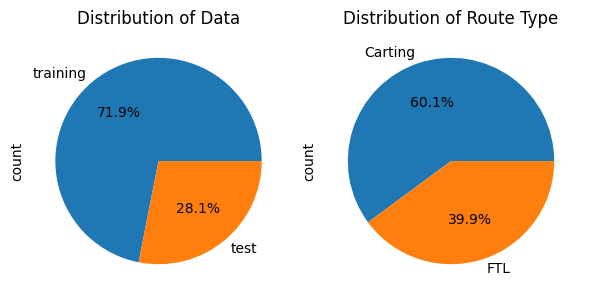

In [ ]:
# Adjust figure size to accommodate two pie charts side by side
plt.figure(figsize=(6, 4))

# First pie chart
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
data['data'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Data')

# Second pie chart
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
data['route_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Route Type')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14817 non-null  category      
 1   trip_creation_time              14817 non-null  datetime64[ns]
 2   route_schedule_uuid             14817 non-null  object        
 3   route_type                      14817 non-null  category      
 4   trip_uuid                       14817 non-null  object        
 5   source_center                   14817 non-null  object        
 6   source_name                     14817 non-null  object        
 7   destination_center              14817 non-null  object        
 8   destination_name                14817 non-null  object        
 9   start_scan_to_end_scan          14817 non-null  float64       
 10  od_time_diff_hour               14817 non-null  float64       
 11  ac

In [ ]:
object_columns=data.select_dtypes(include='object').columns
object_columns

Index(['route_schedule_uuid', 'trip_uuid', 'source_center', 'source_name',
       'destination_center', 'destination_name', 'source_city',
       'source_place_code', 'source_state', 'destination_city',
       'destination_place_code', 'destination_state',
       'Trip_creation_weekname'],
      dtype='object')

In [ ]:
data['Trip_creation_hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int32)

In [ ]:
df_hour=data.groupby('Trip_creation_hour').agg({'trip_uuid':'count'}).reset_index()
df_hour

,Trip_creation_hour,trip_uuid
0,0,994
1,1,750
2,2,702
3,3,652
4,4,636
5,5,509
6,6,611
7,7,473
8,8,346
9,9,324


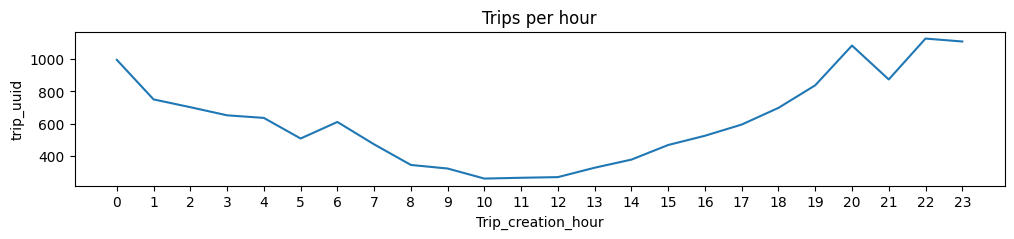

In [ ]:
plt.figure(figsize=(12,2))
sns.lineplot(x='Trip_creation_hour',y='trip_uuid',data=df_hour)
plt.title('Trips per hour')
plt.xticks(np.arange(0,24))
plt.show()

In [ ]:
df_day=data.groupby('Trip_creation_day').agg({'trip_uuid':'count'}).reset_index()
df_day

,Trip_creation_day,trip_uuid
0,1,605
1,2,552
2,3,631
3,12,747
4,13,750
5,14,712
6,15,783
7,16,616
8,17,722
9,18,791


In [ ]:
data['Trip_creation_day'].unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3], dtype=int32)

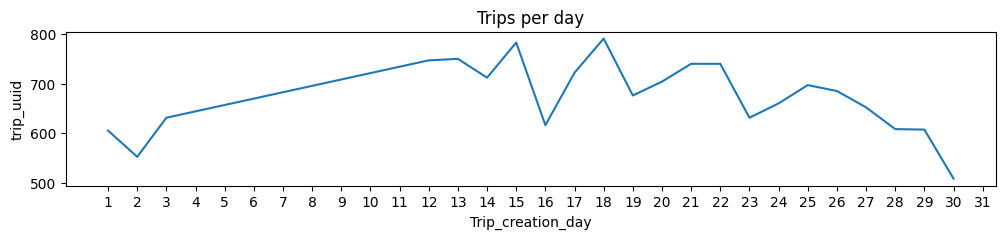

In [ ]:
plt.figure(figsize=(12,2))
sns.lineplot(x='Trip_creation_day',y='trip_uuid',data=df_day)
plt.title('Trips per day')
plt.xticks(np.arange(1,32))
plt.show()

In [ ]:
df_week=data.groupby('Trip_creation_weekname').agg({'trip_uuid':'count'}).reset_index()
df_week

,Trip_creation_weekname,trip_uuid
0,Friday,2060
1,Monday,1987
2,Saturday,2130
3,Sunday,1755
4,Thursday,2106
5,Tuesday,2040
6,Wednesday,2739


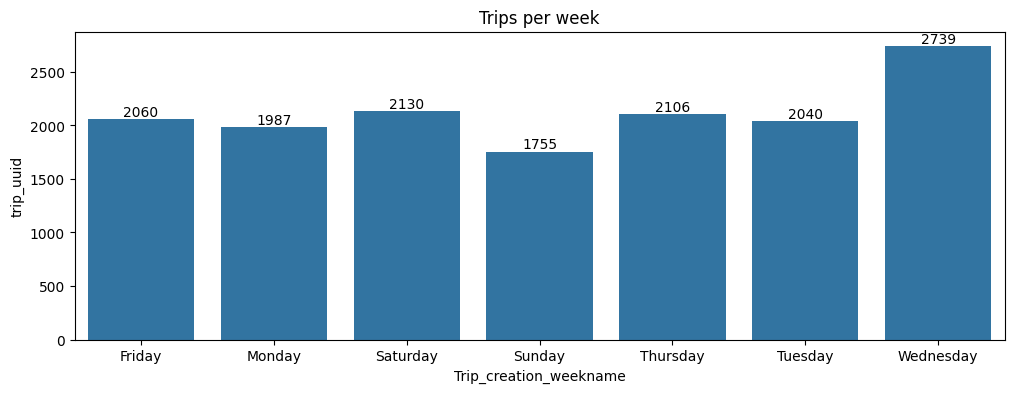

In [ ]:
plt.figure(figsize=(12,4))
g=sns.barplot(x='Trip_creation_weekname',y='trip_uuid',data=df_week)
plt.title('Trips per week')
for i in g.containers:
    g.bar_label(i,)
plt.show()

In [ ]:
# to analys month wise data

df_month=data.groupby('Trip_creation_month').agg({'trip_uuid':'count'}).reset_index()
df_month

,Trip_creation_month,trip_uuid
0,9,13029
1,10,1788


[]

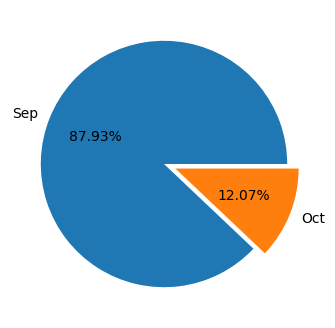

In [ ]:
plt.figure(figsize=(8,4))
plt.pie(x = df_month['trip_uuid'],
        labels = ['Sep', 'Oct'],
        explode = [0, 0.1],
       autopct = '%.2f%%')
plt.plot()

In [ ]:
df_source_state=data.groupby('source_state').agg({'trip_uuid':'count'}).reset_index()
df_source_state=df_source_state.sort_values(by='trip_uuid',ascending=False)
df_source_state

,source_state,trip_uuid
10,Haryana,2907
17,Maharashtra,2005
14,Karnataka,1944
29,Tamil Nadu,902
31,Uttar Pradesh,734
30,Telangana,667
9,Gujarat,613
22,Rajasthan,568
0,Andhra Pradesh,553
21,Punjab,543


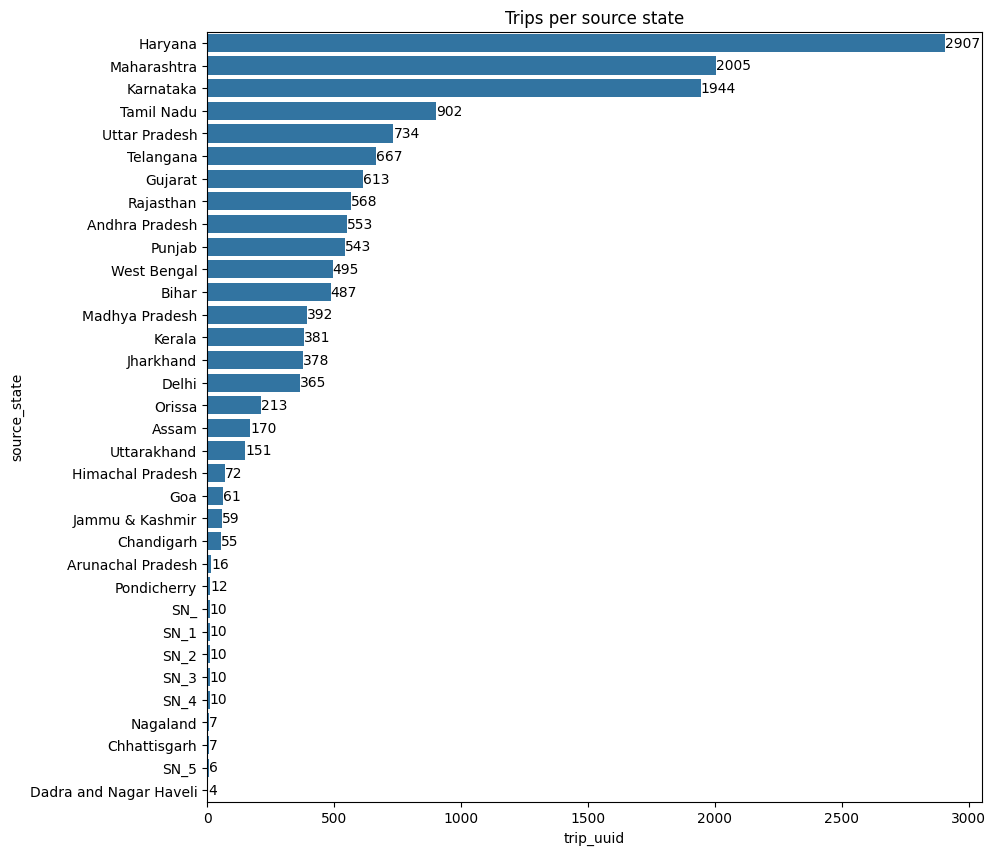

In [ ]:
plt.figure(figsize=(10,10))
g=sns.barplot(x=df_source_state['trip_uuid'],y=df_source_state['source_state'])

for i in g.containers:
    g.bar_label(i,)
plt.title('Trips per source state')
plt.show()

In [ ]:
df_source_city=data.groupby('source_city').agg({'trip_uuid':'count'}).reset_index()
df_source_city=df_source_city.sort_values(by='trip_uuid',ascending=False)[:20]
df_source_city

,source_city,trip_uuid
267,Gurgaon,2411
63,Bangalore,809
104,Bhiwandi,755
84,Bengaluru,499
301,Hyderabad,444
620,Pune,399
194,Delhi,302
146,Chandigarh,293
729,Sonipat,247
644,Ranchi,227


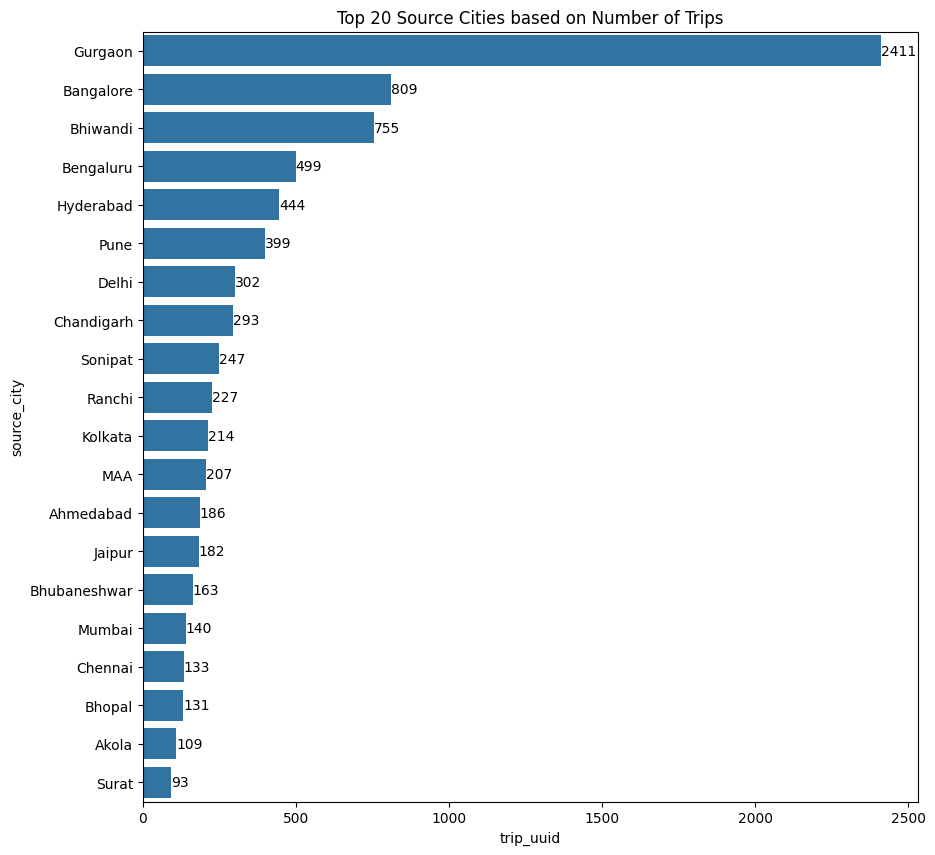

In [ ]:
plt.figure(figsize=(10,10))
g=sns.barplot(x=df_source_city['trip_uuid'],y=df_source_city['source_city'])

for i in g.containers:
    g.bar_label(i,)
plt.title('Top 20 Source Cities based on Number of Trips')
plt.show()

In [ ]:
df_destination_state=data.groupby('destination_state').agg({'trip_uuid':'count'}).reset_index()
df_destination_state=df_destination_state.sort_values(by='trip_uuid',ascending=False)
df_destination_state

,destination_state,trip_uuid
19,Karnataka,2174
22,Maharashtra,2012
15,Haryana,1920
29,Telangana,905
28,Tamil Nadu,891
30,Uttar Pradesh,858
14,Gujarat,806
32,West Bengal,698
0,Andhra Pradesh,667
26,Punjab,618


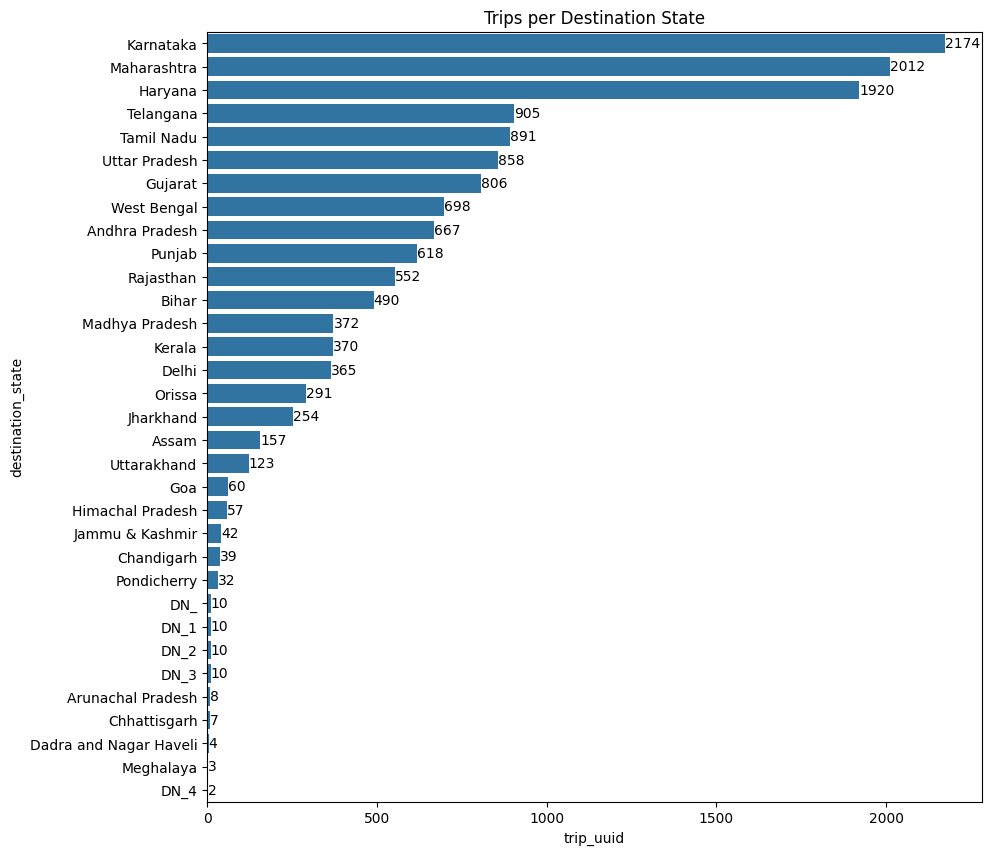

In [ ]:
plt.figure(figsize=(10,10))
g=sns.barplot(x=df_destination_state['trip_uuid'],y=df_destination_state['destination_state'])

for i in g.containers:
    g.bar_label(i,)
plt.title('Trips per Destination State')
plt.show()

In [ ]:
df_destination_city=data.groupby('destination_city').agg({'trip_uuid':'count'}).reset_index()
df_destination_city=df_destination_city.sort_values(by='trip_uuid',ascending=False)[:20]
df_destination_city

,destination_city,trip_uuid
270,Gurgaon,1327
65,Bangalore,958
304,Hyderabad,687
111,Bhiwandi,649
89,Bengaluru,543
617,Pune,466
151,Chandigarh,405
415,Kolkata,403
195,Delhi,331
732,Sonipat,315


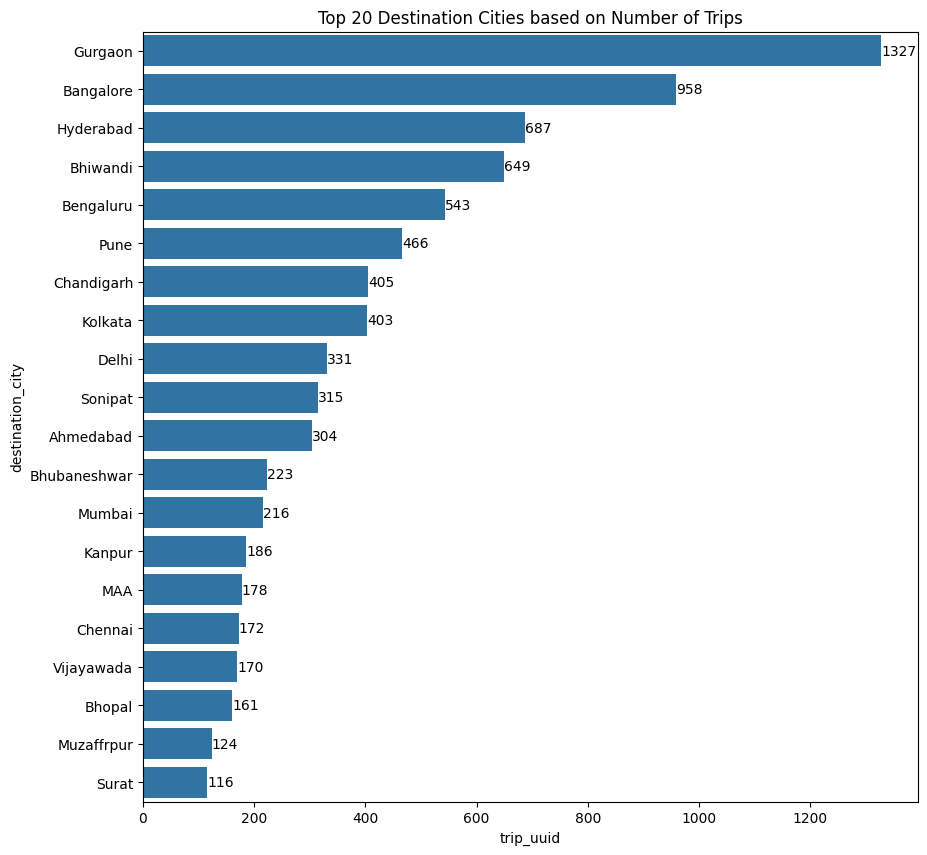

In [ ]:
plt.figure(figsize=(10,10))
g=sns.barplot(x=df_destination_city['trip_uuid'],y=df_destination_city['destination_city'])

for i in g.containers:
    g.bar_label(i,)
plt.title('Top 20 Destination Cities based on Number of Trips')
plt.show()

## Outlier Detection & Treatment


In [ ]:
num_columns

Index(['start_scan_to_end_scan', 'od_time_diff_hour',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
       'segment_osrm_time_sum', 'Trip_creation_month', 'Trip_creation_year',
       'Trip_creation_day', 'Trip_creation_hour'],
      dtype='object')

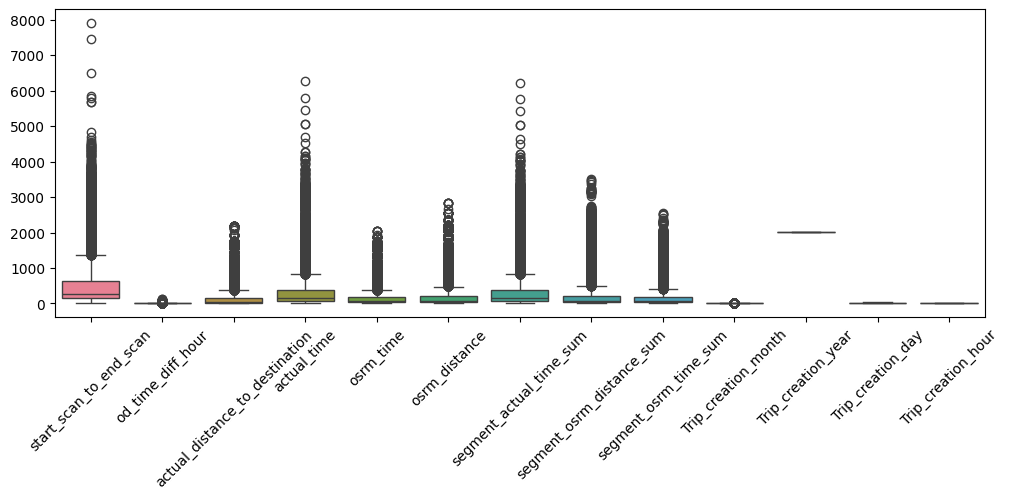

In [ ]:
plt.figure(figsize=(12,4))
sns.boxplot(data=data[num_columns])
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Detecting Outliers using IQR method

for i in num_columns:
  Q1=np.quantile(data[i],0.25)
  Q3=np.quantile(data[i],0.75)
  IQR=Q3-Q1
  upper_limit=Q3+(1.5*IQR)
  lower_limit=Q1-(1.5*IQR)
  Outliers=data[(data[i]>upper_limit) | (data[i]<lower_limit)]
   # Print column and outlier information
  print(f'Column: {i}')
  print(f'Q1: {Q1}')
  print(f'Q3: {Q3}')
  print(f'IQR: {IQR}')
  print(f'Lower Bound (LB): {lower_limit}')
  print(f'Upper Bound (UB): {upper_limit}')
  print(f'Number of outliers: {Outliers.shape[0]}')
  print()  # Blank line for better readability between columns

Column: start_scan_to_end_scan
Q1: 149.0
Q3: 637.0
IQR: 488.0
Lower Bound (LB): -583.0
Upper Bound (UB): 1369.0
Number of outliers: 1267

Column: od_time_diff_hour
Q1: 2.4988431813888887
Q3: 10.636651184722222
IQR: 8.137808003333333
Lower Bound (LB): -9.707868823611111
Upper Bound (UB): 22.843363189722222
Number of outliers: 1266

Column: actual_distance_to_destination
Q1: 22.83723905859321
Q3: 164.58320763841138
IQR: 141.74596857981817
Lower Bound (LB): -189.78171381113404
Upper Bound (UB): 377.2021605081386
Number of outliers: 1449

Column: actual_time
Q1: 67.0
Q3: 370.0
IQR: 303.0
Lower Bound (LB): -387.5
Upper Bound (UB): 824.5
Number of outliers: 1643

Column: osrm_time
Q1: 29.0
Q3: 168.0
IQR: 139.0
Lower Bound (LB): -179.5
Upper Bound (UB): 376.5
Number of outliers: 1517

Column: osrm_distance
Q1: 30.8192
Q3: 208.475
IQR: 177.6558
Lower Bound (LB): -235.6645
Upper Bound (UB): 474.9587
Number of outliers: 1524

Column: segment_actual_time_sum
Q1: 66.0
Q3: 367.0
IQR: 301.0
Lower Bo

Insight :
Outliers may reflect important variations within the population, it's generally recommended to retain them in the dataset rather than remove them.

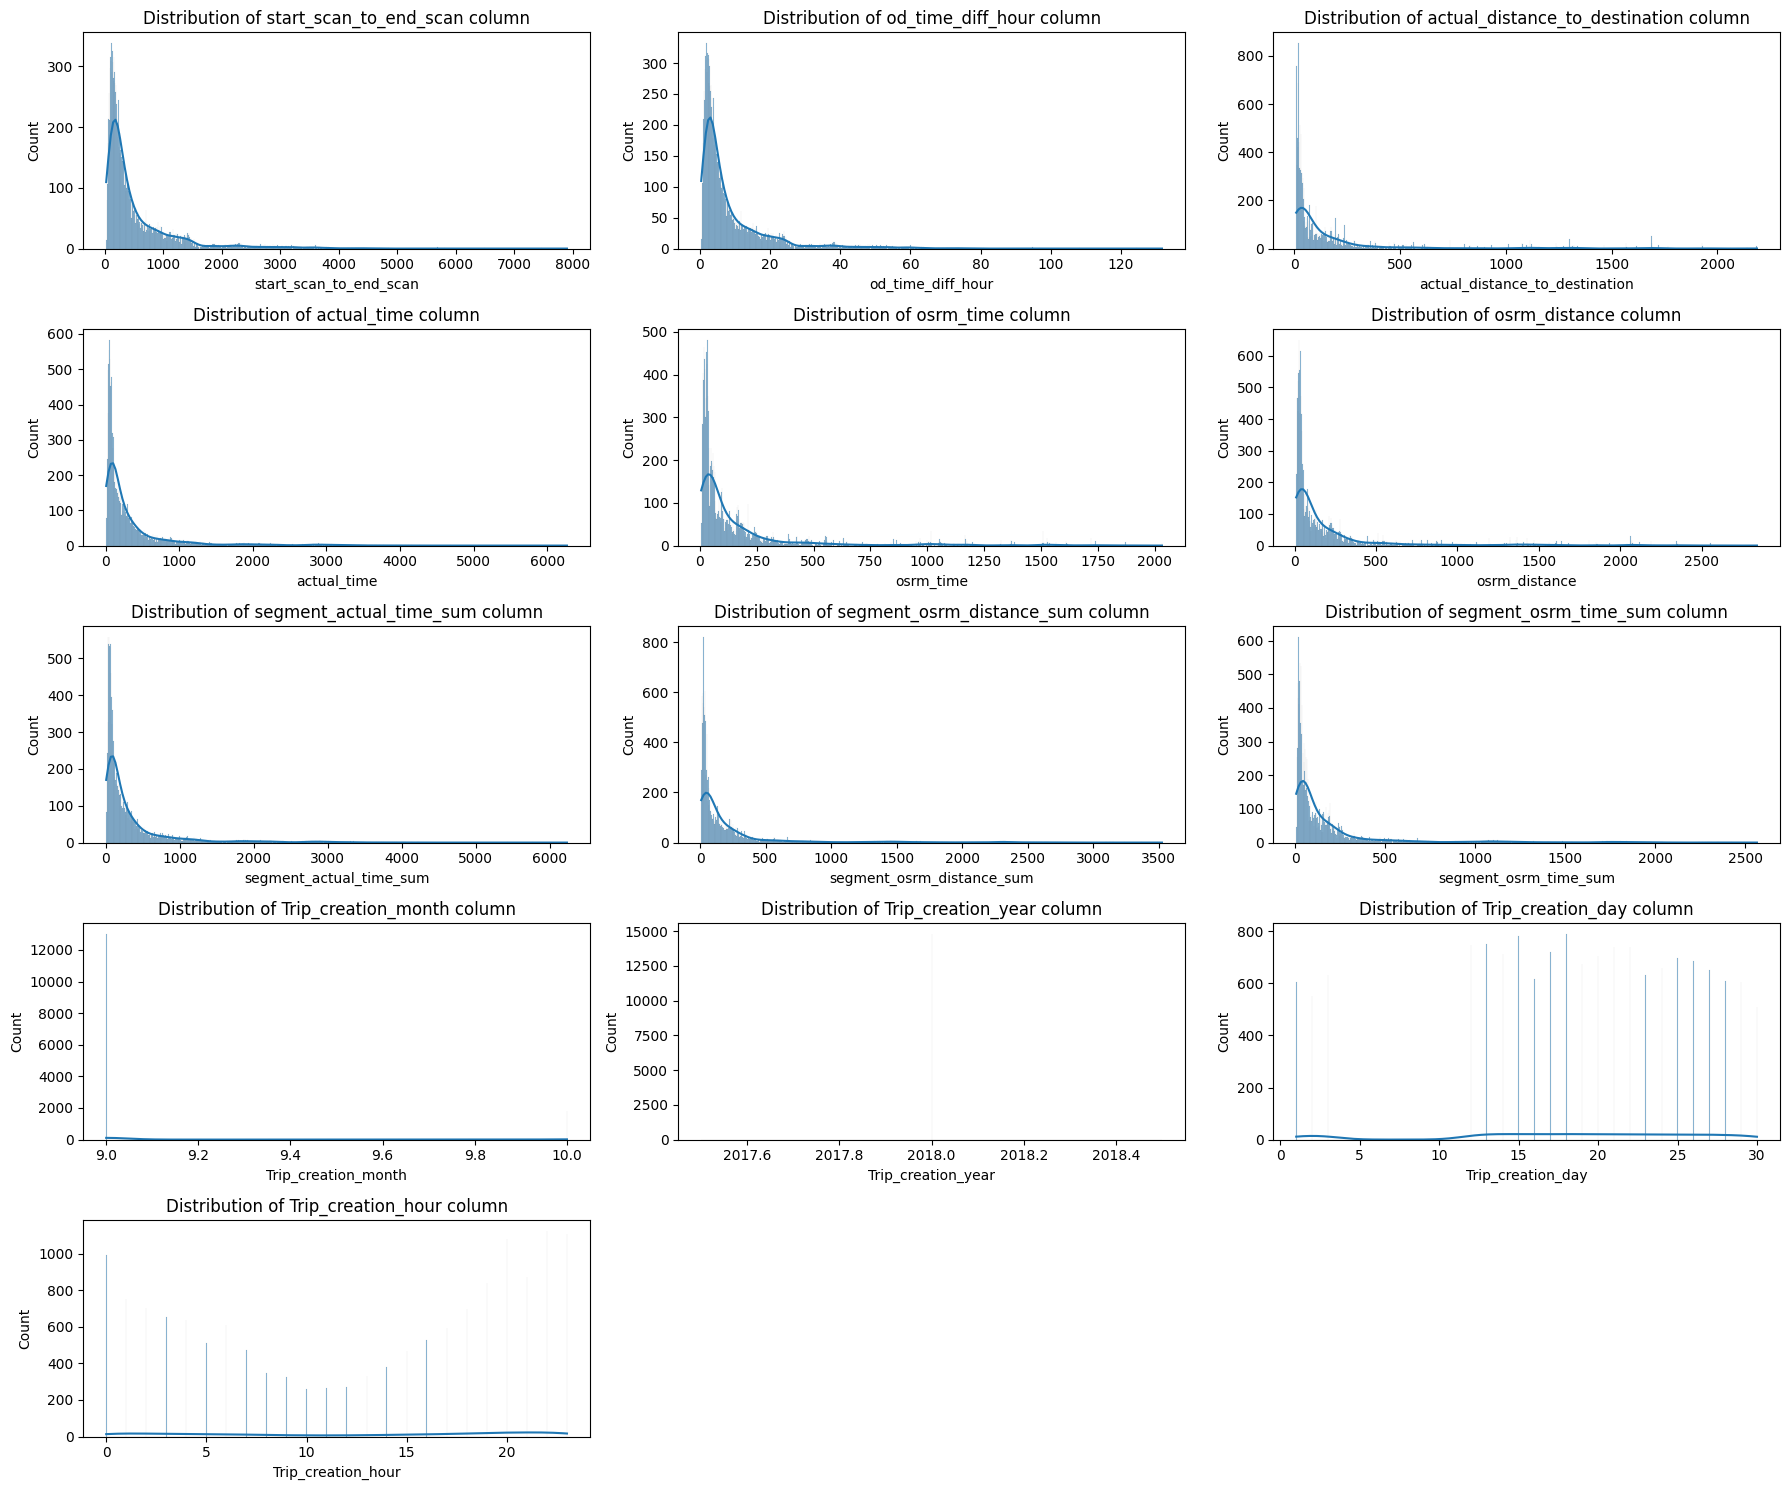

In [ ]:
plt.figure(figsize=(18, 15))
num_rows = int(np.ceil(len(num_columns) / 3))
for i in range(len(num_columns)):
    plt.subplot(num_rows,3, i + 1)  # Create a subplot grid with 3 rows and 3 columns
    sns.histplot(data[num_columns[i]], bins=1000, kde=True)  # Plot the histogram with KDE
    plt.title(f"Distribution of {num_columns[i]} column")  # Title for each subplot

plt.tight_layout()  # Adjust layout to prevent overlapping subplots
plt.show()  # Display all plots

Insights:

Observed that all numerical columns are right skewed.

## One-hot encoding on categorical features

In [ ]:
label_encoder=LabelEncoder()
data['data']=label_encoder.fit_transform(data['data'])
data['data'].value_counts()

,count
data,
1,10654
0,4163


In [ ]:
data['route_type']=label_encoder.fit_transform(data['route_type'])
data['route_type'].value_counts()

,count
route_type,
0,8908
1,5909


## Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler

Data doesn't follow Gaussian distribution hence we are using Minmax Scaler for normalization

In [ ]:
trip_df=data.copy()

In [ ]:
minmaxscaler=MinMaxScaler()
trip_df[num_columns]=minmaxscaler.fit_transform(trip_df[num_columns])

In [ ]:
trip_df.sample()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,source_place_code,source_state,destination_city,destination_place_code,destination_state,Trip_creation_month,Trip_creation_year,Trip_creation_day,Trip_creation_weekname,Trip_creation_hour
14253,0,2018-10-03 02:00:12.947896,thanos::sroute:fbc671d5-317e-4df9-9679-04c9416...,0,trip-153853201294752521,IND396191AAC,Vapi_IndEstat_I (Gujarat),IND396210AAA,Daman_DC (Daman & Diu),0.00419,...,AtoNgrRd_I,Andhra Pradesh,Hyderabad,Shamshbd_H,Telangana,1.0,0.0,0.068966,Wednesday,0.086957


In [ ]:
standard_scaler=StandardScaler()
trip_df[num_columns]=standard_scaler.fit_transform(trip_df[num_columns])

In [ ]:
trip_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,source_place_code,source_state,destination_city,destination_place_code,destination_state,Trip_creation_month,Trip_creation_year,Trip_creation_day,Trip_creation_weekname,Trip_creation_hour
0,1,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2.623702,...,VUNagar_DC,Gujarat,Khambhat,MotvdDPP_D,Gujarat,-0.370449,0.0,-0.807143,Wednesday,-1.558901
1,1,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,0,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),-0.532593,...,VUNagar_DC,Gujarat,Khambhat,MotvdDPP_D,Gujarat,-0.370449,0.0,-0.807143,Wednesday,-1.558901
2,1,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,1,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),5.165134,...,VUNagar_DC,Gujarat,Khambhat,MotvdDPP_D,Gujarat,-0.370449,0.0,-0.807143,Wednesday,-1.558901
3,1,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,0,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),-0.654047,...,VUNagar_DC,Gujarat,Khambhat,MotvdDPP_D,Gujarat,-0.370449,0.0,-0.807143,Wednesday,-1.558901
4,1,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,1,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),0.282670,...,VUNagar_DC,Gujarat,Khambhat,MotvdDPP_D,Gujarat,-0.370449,0.0,-0.807143,Wednesday,-1.558901


# Hypothesis Testing

## Perform hypothesis testing / visual analysis between actual_time aggregated value and OSRM time aggregated value.

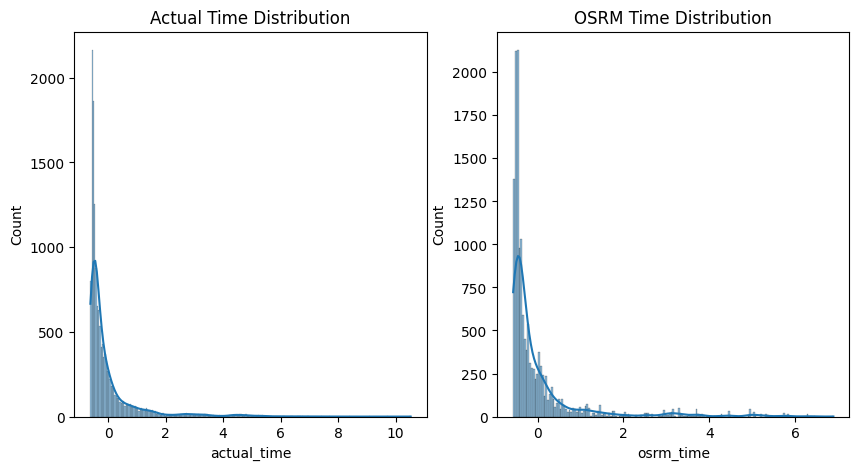

At least one distribution is not normal. Proceeding with Mann-Whitney U test.
Reject the null hypothesis (p = 1.8017744530194553e-20). There is a significant difference between actual time and OSRM time.


In [ ]:
# Null Hypothesis (H0): The mean of actual_time is equal to the mean of OSRM_time.
# Alternative Hypothesis (H1): The mean of actual_time is not equal to the mean of OSRM_time.

# Step 1: Aggregating the actual_time and OSRM_time
actual_time_aggregated = trip_df['actual_time'].mean()  # or use sum() for total time
osrm_time_aggregated = trip_df['osrm_time'].mean()  # or use sum()

# Step 2: Visualize the distributions
plt.figure(figsize=(10, 5))

# Plot actual_time distribution
plt.subplot(1, 2, 1)
sns.histplot(trip_df['actual_time'], kde=True)
plt.title('Actual Time Distribution')

# Plot OSRM_time distribution
plt.subplot(1, 2, 2)
sns.histplot(trip_df['osrm_time'], kde=True)
plt.title('OSRM Time Distribution')

plt.show()

# Step 3: Check for normality (Shapiro-Wilk Test)
_, p_actual = stats.shapiro(trip_df['actual_time'])
_, p_osrm = stats.shapiro(trip_df['osrm_time'])

# Step 4: Perform the appropriate hypothesis test
if p_actual > 0.05 and p_osrm > 0.05:
    print("Both distributions are normal. Proceeding with t-test.")
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(trip_df['actual_time'], trip_df['osrm_time'])
else:
    print("At least one distribution is not normal. Proceeding with Mann-Whitney U test.")
    # Perform Mann-Whitney U test
    t_stat, p_value = stats.mannwhitneyu(trip_df['actual_time'], trip_df['osrm_time'])

# Step 5: Interpret the result
alpha = 0.05
if p_value < alpha:
    print(f"Reject the null hypothesis (p = {p_value}). There is a significant difference between actual time and OSRM time.")
else:
    print(f"Fail to reject the null hypothesis (p = {p_value}). There is no significant difference between actual time and OSRM time.")


There is strong statistical evidence to conclude that there is a significant difference between actual_time and osrm_time.

## Actual_time aggregated value and segment actual time aggregated value.

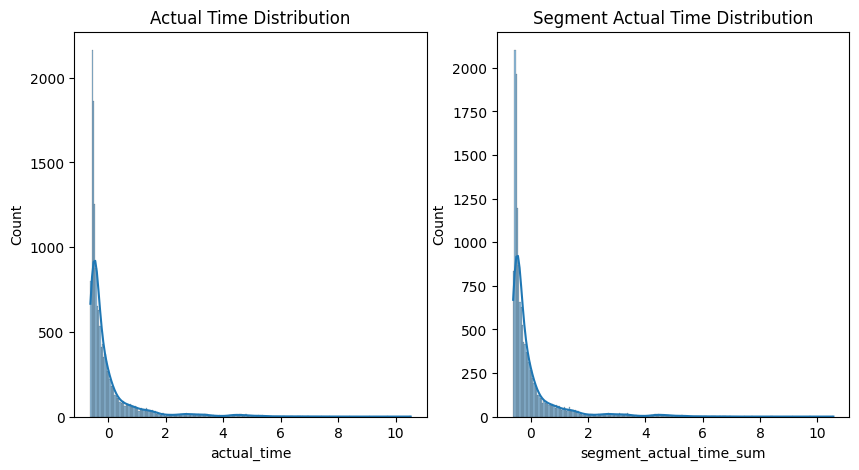

At least one distribution is not normal. Proceed with Mann-Whitney U test.
Fail to reject the null hypothesis (p = 0.8751961869095426). There is no significant difference between actual time and segment actual time.


In [ ]:
# Null Hypothesis (H0): There is no significant difference between the mean of actual_time and segment_actual_time.
# Alternative Hypothesis (H1): There is a significant difference between the mean of actual_time and segment_actual_time.

# Aggregating the actual_time and segment_actual_time (example: using mean for each)
actual_time_aggregated = trip_df['actual_time'].mean()
segment_actual_time_aggregated = trip_df['segment_actual_time_sum'].mean()

# Visualizing the two distributions
plt.figure(figsize=(10, 5))

# Plotting actual_time distribution
plt.subplot(1, 2, 1)
sns.histplot(trip_df['actual_time'], kde=True)
plt.title('Actual Time Distribution')

# Plotting segment_actual_time distribution
plt.subplot(1, 2, 2)
sns.histplot(trip_df['segment_actual_time_sum'], kde=True)
plt.title('Segment Actual Time Distribution')

plt.show()

# Step 1: Perform normality test (Shapiro-Wilk Test)
_, p_actual = stats.shapiro(trip_df['actual_time'])
_, p_segment_actual = stats.shapiro(trip_df['segment_actual_time_sum'])

# Step 2: Check normality and perform the appropriate test
if p_actual > 0.05 and p_segment_actual > 0.05:
    print("Both distributions are normal. Proceed with t-test.")
    # Perform two-sample t-test
    t_stat, p_value = stats.ttest_ind(trip_df['actual_time'], trip_df['segment_actual_time_sum'])
else:
    print("At least one distribution is not normal. Proceed with Mann-Whitney U test.")
    # Perform Mann-Whitney U test (non-parametric test)
    t_stat, p_value = stats.mannwhitneyu(trip_df['actual_time'], trip_df['segment_actual_time_sum'])

# Step 3: Interpret the result
alpha = 0.05
if p_value < alpha:
    print(f"Reject the null hypothesis (p = {p_value}). There is a significant difference between actual time and segment actual time.")
else:
    print(f"Fail to reject the null hypothesis (p = {p_value}). There is no significant difference between actual time and segment actual time.")


## OSRM distance aggregated value and segment OSRM distance aggregated value.

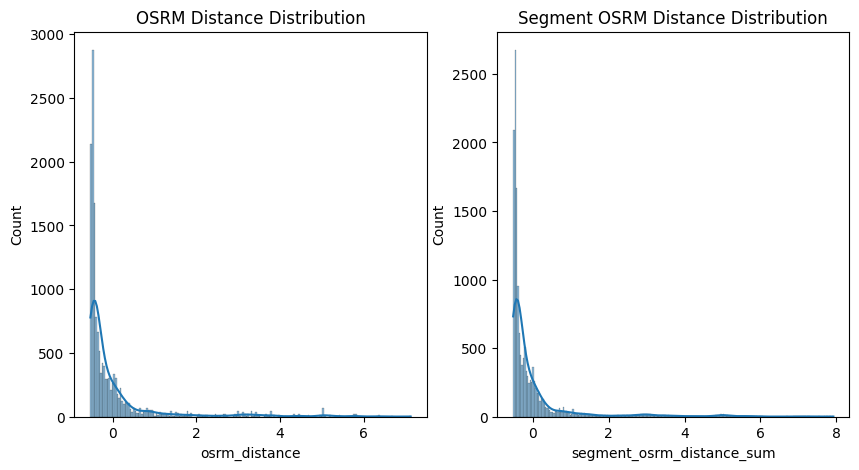

At least one distribution is not normal. Proceed with Mann-Whitney U test.
Reject the null hypothesis (p = 6.907077273066204e-11). There is a significant difference between OSRM distance and segment OSRM distance.


In [ ]:
# Null Hypothesis (H0): The mean OSRM distance is equal to the mean segment OSRM distance.
# Alternative Hypothesis (H1): The mean OSRM distance is not equal to the mean segment OSRM distance.

# Step 1: Aggregate the values (for example, summing up distances)
osrm_aggregated = trip_df['osrm_distance'].sum()
segment_osrm_aggregated = trip_df['segment_osrm_distance_sum'].sum()

# Visualizing the two distributions
plt.figure(figsize=(10, 5))

# Plotting OSRM distance
plt.subplot(1, 2, 1)
sns.histplot(trip_df['osrm_distance'], kde=True)
plt.title('OSRM Distance Distribution')

# Plotting Segment OSRM distance
plt.subplot(1, 2, 2)
sns.histplot(trip_df['segment_osrm_distance_sum'], kde=True)
plt.title('Segment OSRM Distance Distribution')

plt.show()

# Step 2: Perform normality test (Shapiro-Wilk Test)
_, p_osrm = stats.shapiro(trip_df['osrm_distance'])
_, p_segment = stats.shapiro(trip_df['segment_osrm_distance_sum'])

# Check normality
if p_osrm > 0.05 and p_segment > 0.05:
    print("Both distributions are normal. Proceed with t-test.")
    # Perform two-sample t-test
    t_stat, p_value = stats.ttest_ind(trip_df['osrm_distance'], trip_df['segment_osrm_distance_sum'])
else:
    print("At least one distribution is not normal. Proceed with Mann-Whitney U test.")
    # Perform Mann-Whitney U test (non-parametric test)
    t_stat, p_value = stats.mannwhitneyu(trip_df['osrm_distance'], trip_df['segment_osrm_distance_sum'])

# Step 3: Interpret the result
alpha = 0.05
if p_value < alpha:
    print(f"Reject the null hypothesis (p = {p_value}). There is a significant difference between OSRM distance and segment OSRM distance.")
else:
    print(f"Fail to reject the null hypothesis (p = {p_value}). There is no significant difference between OSRM distance and segment OSRM distance.")


## OSRM time aggregated value and segment OSRM time aggregated value.

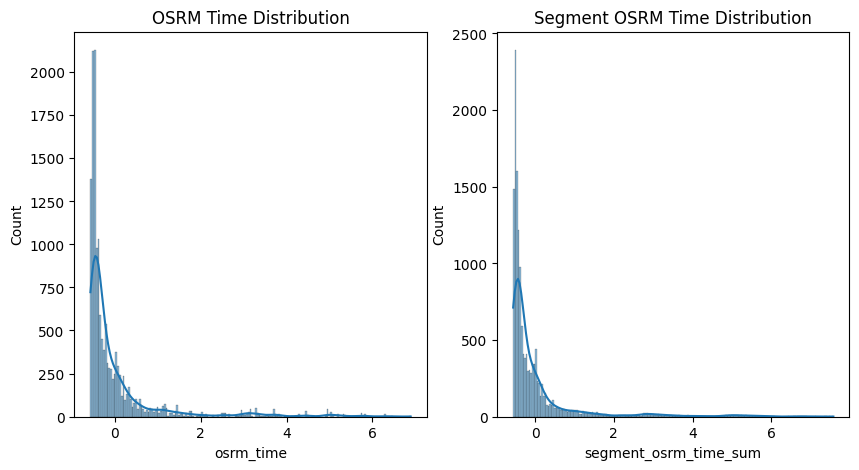

At least one distribution is not normal. Proceeding with Mann-Whitney U test.
Reject the null hypothesis (p = 5.021740226437264e-06). There is a significant difference between OSRM time and segment OSRM time.


In [ ]:
# Null Hypothesis (H0): The mean of OSRM_time is equal to the mean of segment_OSRM_time.
# Alternative Hypothesis (H1): The mean of OSRM_time is not equal to the mean of segment_OSRM_time.

# Step 1: Aggregating the OSRM times (mean or sum)
osrm_time_aggregated = trip_df['osrm_time'].mean()  # or use sum() for total values
segment_osrm_time_aggregated = trip_df['segment_osrm_time_sum'].mean()  # or use sum()

# Step 2: Visualize the distributions
plt.figure(figsize=(10, 5))

# Plot OSRM time distribution
plt.subplot(1, 2, 1)
sns.histplot(trip_df['osrm_time'], kde=True)
plt.title('OSRM Time Distribution')

# Plot segment OSRM time distribution
plt.subplot(1, 2, 2)
sns.histplot(trip_df['segment_osrm_time_sum'], kde=True)
plt.title('Segment OSRM Time Distribution')

plt.show()

# Step 3: Check for normality (Shapiro-Wilk Test)
_, p_osrm = stats.shapiro(trip_df['osrm_time'])
_, p_segment_osrm = stats.shapiro(trip_df['segment_osrm_time_sum'])

# Step 4: Perform the appropriate hypothesis test
if p_osrm > 0.05 and p_segment_osrm > 0.05:
    print("Both distributions are normal. Proceeding with t-test.")
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(trip_df['osrm_time'], trip_df['segment_osrm_time_sum'])
else:
    print("At least one distribution is not normal. Proceeding with Mann-Whitney U test.")
    # Perform Mann-Whitney U test
    t_stat, p_value = stats.mannwhitneyu(trip_df['osrm_time'], trip_df['segment_osrm_time_sum'])

# Step 5: Interpret the result
alpha = 0.05
if p_value < alpha:
    print(f"Reject the null hypothesis (p = {p_value}). There is a significant difference between OSRM time and segment OSRM time.")
else:
    print(f"Fail to reject the null hypothesis (p = {p_value}). There is no significant difference between OSRM time and segment OSRM time.")


In [ ]:
# Step 1: Identify the corridor (source-destination pair)
data['corridor'] = data['source_state'] + ' -> ' + data['destination_state']

# Step 2: Group by the corridor and calculate the necessary metrics

# Calculate the busiest corridor based on the number of trips
busiest_corridor = data.groupby('corridor').size().reset_index(name='trip_count').sort_values(by='trip_count', ascending=False)

# Step 3: Calculate the average distance for each corridor
avg_distance = data.groupby('corridor')['actual_distance_to_destination'].mean().reset_index(name='avg_distance')

# Step 4: Calculate the average time taken for each corridor
avg_time = data.groupby('corridor')['actual_time'].mean().reset_index(name='avg_actual_time')

# Merge the results together to get a complete view
corridor_stats = busiest_corridor.merge(avg_distance, on='corridor').merge(avg_time, on='corridor')

# Display the top results (e.g., top 10 busiest corridors)
print(corridor_stats.head(10))


                           corridor  trip_count  avg_distance  avg_actual_time
0            Karnataka -> Karnataka        1304    162.999832       353.531442
1        Maharashtra -> Maharashtra        1296    158.108488       351.398148
2          Tamil Nadu -> Tamil Nadu         771    168.502314       363.003891
3    Uttar Pradesh -> Uttar Pradesh         536    165.693040       361.442164
4              Haryana -> Karnataka         516    174.673986       368.844961
5                Haryana -> Haryana         497    163.690001       344.830986
6            Rajasthan -> Rajasthan         477    150.350379       332.354298
7                Gujarat -> Gujarat         461    171.196345       362.809111
8            Telangana -> Telangana         395    156.262291       349.197468
9  Andhra Pradesh -> Andhra Pradesh         391    165.304840       364.930946


In [ ]:
# Step 1: Identify the corridor (source-destination pair)
data['corridor'] = data['source_city'] + ' -> ' + data['destination_city']

# Step 2: Group by the corridor and calculate the necessary metrics

# Calculate the busiest corridor based on the number of trips
busiest_corridor = data.groupby('corridor').size().reset_index(name='trip_count').sort_values(by='trip_count', ascending=False)

# Step 3: Calculate the average distance for each corridor
avg_distance = data.groupby('corridor')['actual_distance_to_destination'].mean().reset_index(name='avg_distance')

# Step 4: Calculate the average time taken for each corridor
avg_time = data.groupby('corridor')['actual_time'].mean().reset_index(name='avg_actual_time')

# Merge the results together to get a complete view
corridor_stats = busiest_corridor.merge(avg_distance, on='corridor').merge(avg_time, on='corridor')

# Display the top results (e.g., top 10 busiest corridors)
print(corridor_stats.head(10))

                 corridor  trip_count  avg_distance  avg_actual_time
0    Gurgaon -> Bangalore         516    174.673986       368.844961
1     Gurgaon -> Bhiwandi         293    147.546119       310.795222
2  Bengaluru -> Bengaluru         285    143.612817       311.940351
3    Bangalore -> Gurgaon         281    204.228916       425.587189
4      Gurgaon -> Kolkata         239    164.900296       366.037657
5    Gurgaon -> Hyderabad         225    158.118888       328.044444
6  Bangalore -> Bengaluru         192    157.149652       339.276042
7        Gurgaon -> Delhi         143    225.038983       494.342657
8       Ranchi -> Gurgaon         141    189.491592       416.340426
9  Hyderabad -> Hyderabad         128    144.191176       308.476562


**Insights:**

* The data is given from the period '2018-09-12 00:00:16' to '2018-10-08 03:00:24'.
* There are about 14817 unique trip IDs, 1508 unique source centers, 1481 unique destination_centers, 690 unique source cities, 806 unique destination cities.
* Most common route type is Carting.
* The number of trips start increasing after the noon, becomes maximum at 10 P.M and then start decreasing.
* Most orders are comes from mid of the month.
* Most of the trips are on Wednesday.
* A significant portion of trips originate from states like Haryana, followed closely by Maharashtra and Karnataka.
* A significant portion of trips originate from Gurgaon, followed closely by Bengaluru, and Bhiwandi, indicating a robust seller presence in these cities.
* Most of the trips are ends in the states like Karnataka and followed by Maharashtra and Haryana.
* Most of the trips are ends in the cities like Bengaluru and followed by Gurgaon and Hyderabad.
* The busiest state corridor, based on average distance and average time, is Karnataka, followed by Maharashtra and Tamil Nadu.
* Busiest corrider between the cities based on average distance and average time is Gurgaon and Bengaluru.
* There is a significant difference between actual time and OSRM time.
* There is no significant difference between actual time and segment actual time.
*  There is a significant difference between OSRM distance and segment OSRM distance.
*  There is a significant difference between OSRM time and segment OSRM time.


**Recommendations:**

**Optimize Operations for Peak Times:**

With trip volumes peaking after noon and reaching a maximum at 10 PM, operational strategies should be adjusted to accommodate this demand. This could involve increasing the number of available vehicles and drivers during these hours to improve service levels and reduce wait times.

**Focus on Mid-Month Promotions:**

Since most orders come from the middle of the month, consider implementing promotional strategies or marketing campaigns specifically targeting this time frame to further boost trip volumes. This could involve discounts or incentives for trips initiated during this period.

**Leverage Popular Route Types:**

Given that carting is the most common route type, explore opportunities to expand services or improve efficiency in this area. This could include dedicated resources for carting routes or developing partnerships with businesses that frequently use these routes.

**Address Significant Time Discrepancies:**

The significant difference between actual time and OSRM time suggests the need for refining the routing algorithms or addressing external factors affecting travel times. Consider incorporating real-time traffic data or optimizing routes based on historical performance to improve prediction accuracy.

**Monitor and Optimize Corridor Performance:**

With Karnataka being identified as the busiest state corridor, it may be beneficial to focus on optimizing operations in this region. Analyze the factors contributing to this high demand and ensure sufficient resources are allocated to maintain service levels.

**Enhance Service in Key Cities:**

Since Gurgaon, Bengaluru, and Bhiwandi show a robust seller presence, consider establishing dedicated support teams or resources in these cities. This could enhance service delivery and improve customer satisfaction.

**Improve Routing and Time Estimates:**

Given the significant differences found between OSRM distances and actual distances, it is essential to refine routing algorithms to provide more accurate time and distance predictions. This could help in better planning and resource allocation.

**Focus on End Destination Optimization:**

With Karnataka, Maharashtra, and Haryana being popular end states for trips, consider optimizing delivery and pick-up points in these regions to enhance efficiency. Understanding the factors driving end destinations can inform better route planning.

**Analyze Day-of-Week Trends:**

Since most trips occur on Wednesdays, further investigate what factors contribute to this trend. If it correlates with specific promotions or events, consider leveraging this insight for targeted marketing or operational adjustments.

**Evaluate Performance Based on Distance and Time:**

The busiest corridors between cities should be monitored for performance metrics. Establishing KPIs to track efficiency in these high-traffic corridors can help in identifying areas for improvement and resource allocation.